# NYC Department of Education: Data Task

Applicant:Lingchen Kong

## Step 1: Conduct exploratory data analysis (EDA)

In [1]:
# python library version
import sys
print('Python: {}'.format(sys.version))

import numpy
print('numpy: {}'.format(sys.version))

import matplotlib
print('matplotlib: {}'.format(sys.version))

import pandas
print('pandas: {}'.format(sys.version))

import sklearn
print('sklearn: {}'.format(sys.version))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
numpy: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
matplotlib: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
pandas: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
sklearn: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [2]:
# Import the library
from urllib.request import urlretrieve
import numpy as np
import pandas as pd

from sklearn.tree import export_graphviz
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

###### Let us read the dataset first

In [4]:
# read the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data'
urlretrieve(url, 'slump_test.data')
df = pd.read_csv('slump_test.data')

###### What is the dimension of this dataset?

In [5]:
# Dimension of the dataset
print(df.shape)

(103, 11)


The dataset has 103 rows and 11 columns. But according to the dataset description, there should be 10 columns. Let us check the first few rows of our dataset.

In [6]:
# peek at the dataset
# let us first look at the head
df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [7]:
# peek at the tail
df.tail()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
98,99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,100,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,102,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17
102,103,348.7,0.1,223.1,208.5,9.6,786.2,758.1,29.0,78.0,48.77


We do not need the column "No" so let us drop it from the original data frame.

In [8]:
# drop cololum No
df.drop("No", axis=1, inplace=True,)

###### Check the columns again

In [9]:
#check columns
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

That is much better.

###### Check the column type

In [10]:
# check column types
df.dtypes

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

All the variables in our dataset are numerical data.

###### Is there any missing values in our dataset?

In [9]:
# checking missing values
df.isnull().sum()

No                                    0
Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

Great. There is no missing values.

###### Since all the variables are numerical, let us check basic statistics.

In [11]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


As we can see from the above statistics, 7 ingredients have a different range of values. It is probably because coarse aggregation is one of the most important ingredients in the production process so it has the largest average amount. While on the other hand, SP (superplasticizer) has a much smaller mean. This may indicate some data transformation job before we build the models. Another thing worth noticing is that some ingredients such as cement, fly ash, and slag have a quite large standard deviation compared to their average. We should check the distribution later.

## Visualization

### Univariate Analysis

###### What is the distribution of each numerical variable?

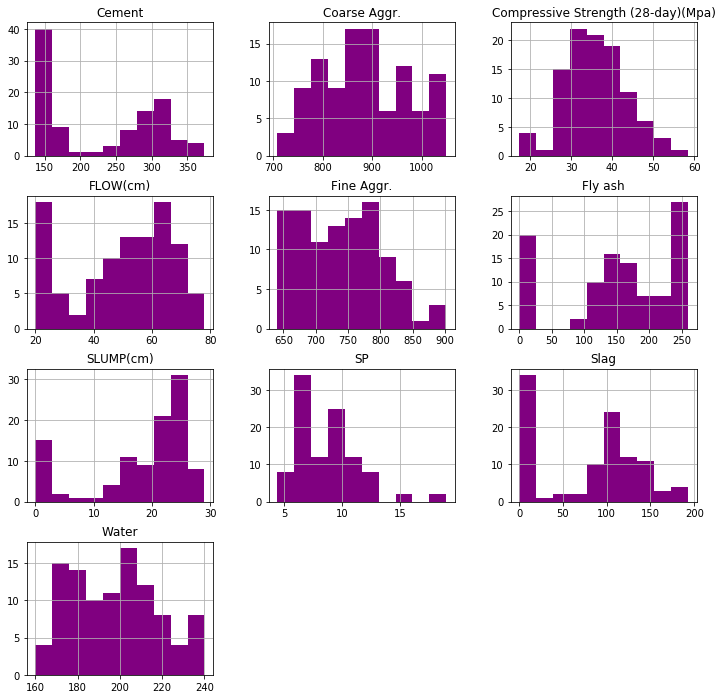

In [36]:
# variable distribution
df.hist(color='purple', figsize=(12,12))
plt.show()

Except for Water, Coarse Aggr, and our target variable (Compressive Strength (28-day)(Mpa)), most variables are not normally distributed. let us take a close look at our target variable.

Skewness: 0.192235
Kurtosis: 0.202536


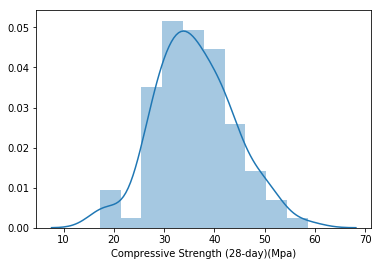

In [14]:
# explore the target variable
sns.distplot(df['Compressive Strength (28-day)(Mpa)'])
print("Skewness: %f" % df['Compressive Strength (28-day)(Mpa)'].skew())
print("Kurtosis: %f" % df['Compressive Strength (28-day)(Mpa)'].kurt())

Great. The target variable almost follows a normal distribution, which indicates the data is quite balanced.

###### Is there any outlier in our dataset?

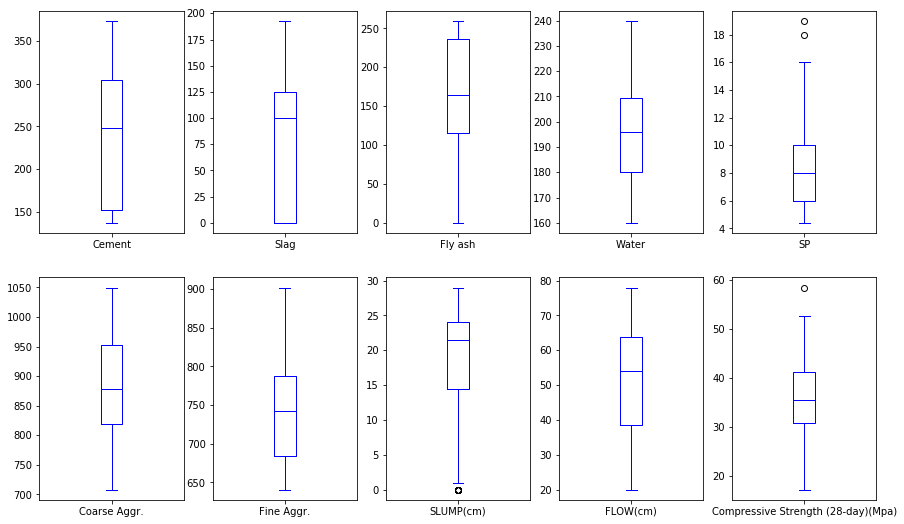

In [21]:
# plot all the box plot 
df.plot(kind = 'box', subplots = 'True', layout = (2,5), color = 'blue', figsize = (15,9))
plt.show()

It seems we have several outliers in SP, SlUMP, and Compressive Strength. Let's take a closer look.

In [24]:
df[df['Compressive Strength (28-day)(Mpa)'] > 55]

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
48,332.0,0.0,170.0,160.0,6.0,900.0,806.0,0.0,20.0,58.53


In [25]:
df[df['SP'] > 16]

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
6,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.0,20.0,38.86


In [29]:
df[df['SLUMP(cm)'] == 0]

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
6,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.0,20.0,38.86
22,148.0,180.0,0.0,183.0,11.0,972.0,757.0,0.0,20.0,18.52
24,142.0,130.0,167.0,174.0,11.0,883.0,785.0,0.0,20.0,36.72
48,332.0,0.0,170.0,160.0,6.0,900.0,806.0,0.0,20.0,58.53
70,276.0,90.0,116.0,180.0,9.0,870.0,768.0,0.0,20.0,44.08
93,172.0,162.1,238.5,166.0,7.4,953.3,641.4,0.0,20.0,41.54
94,172.8,158.3,239.5,166.4,7.4,952.6,644.1,0.0,20.0,41.81
95,184.3,153.4,239.2,179.0,7.5,920.2,640.9,0.0,20.0,41.01
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97


### Multivariate Analysis

###### Check scatterplots between each numerical data

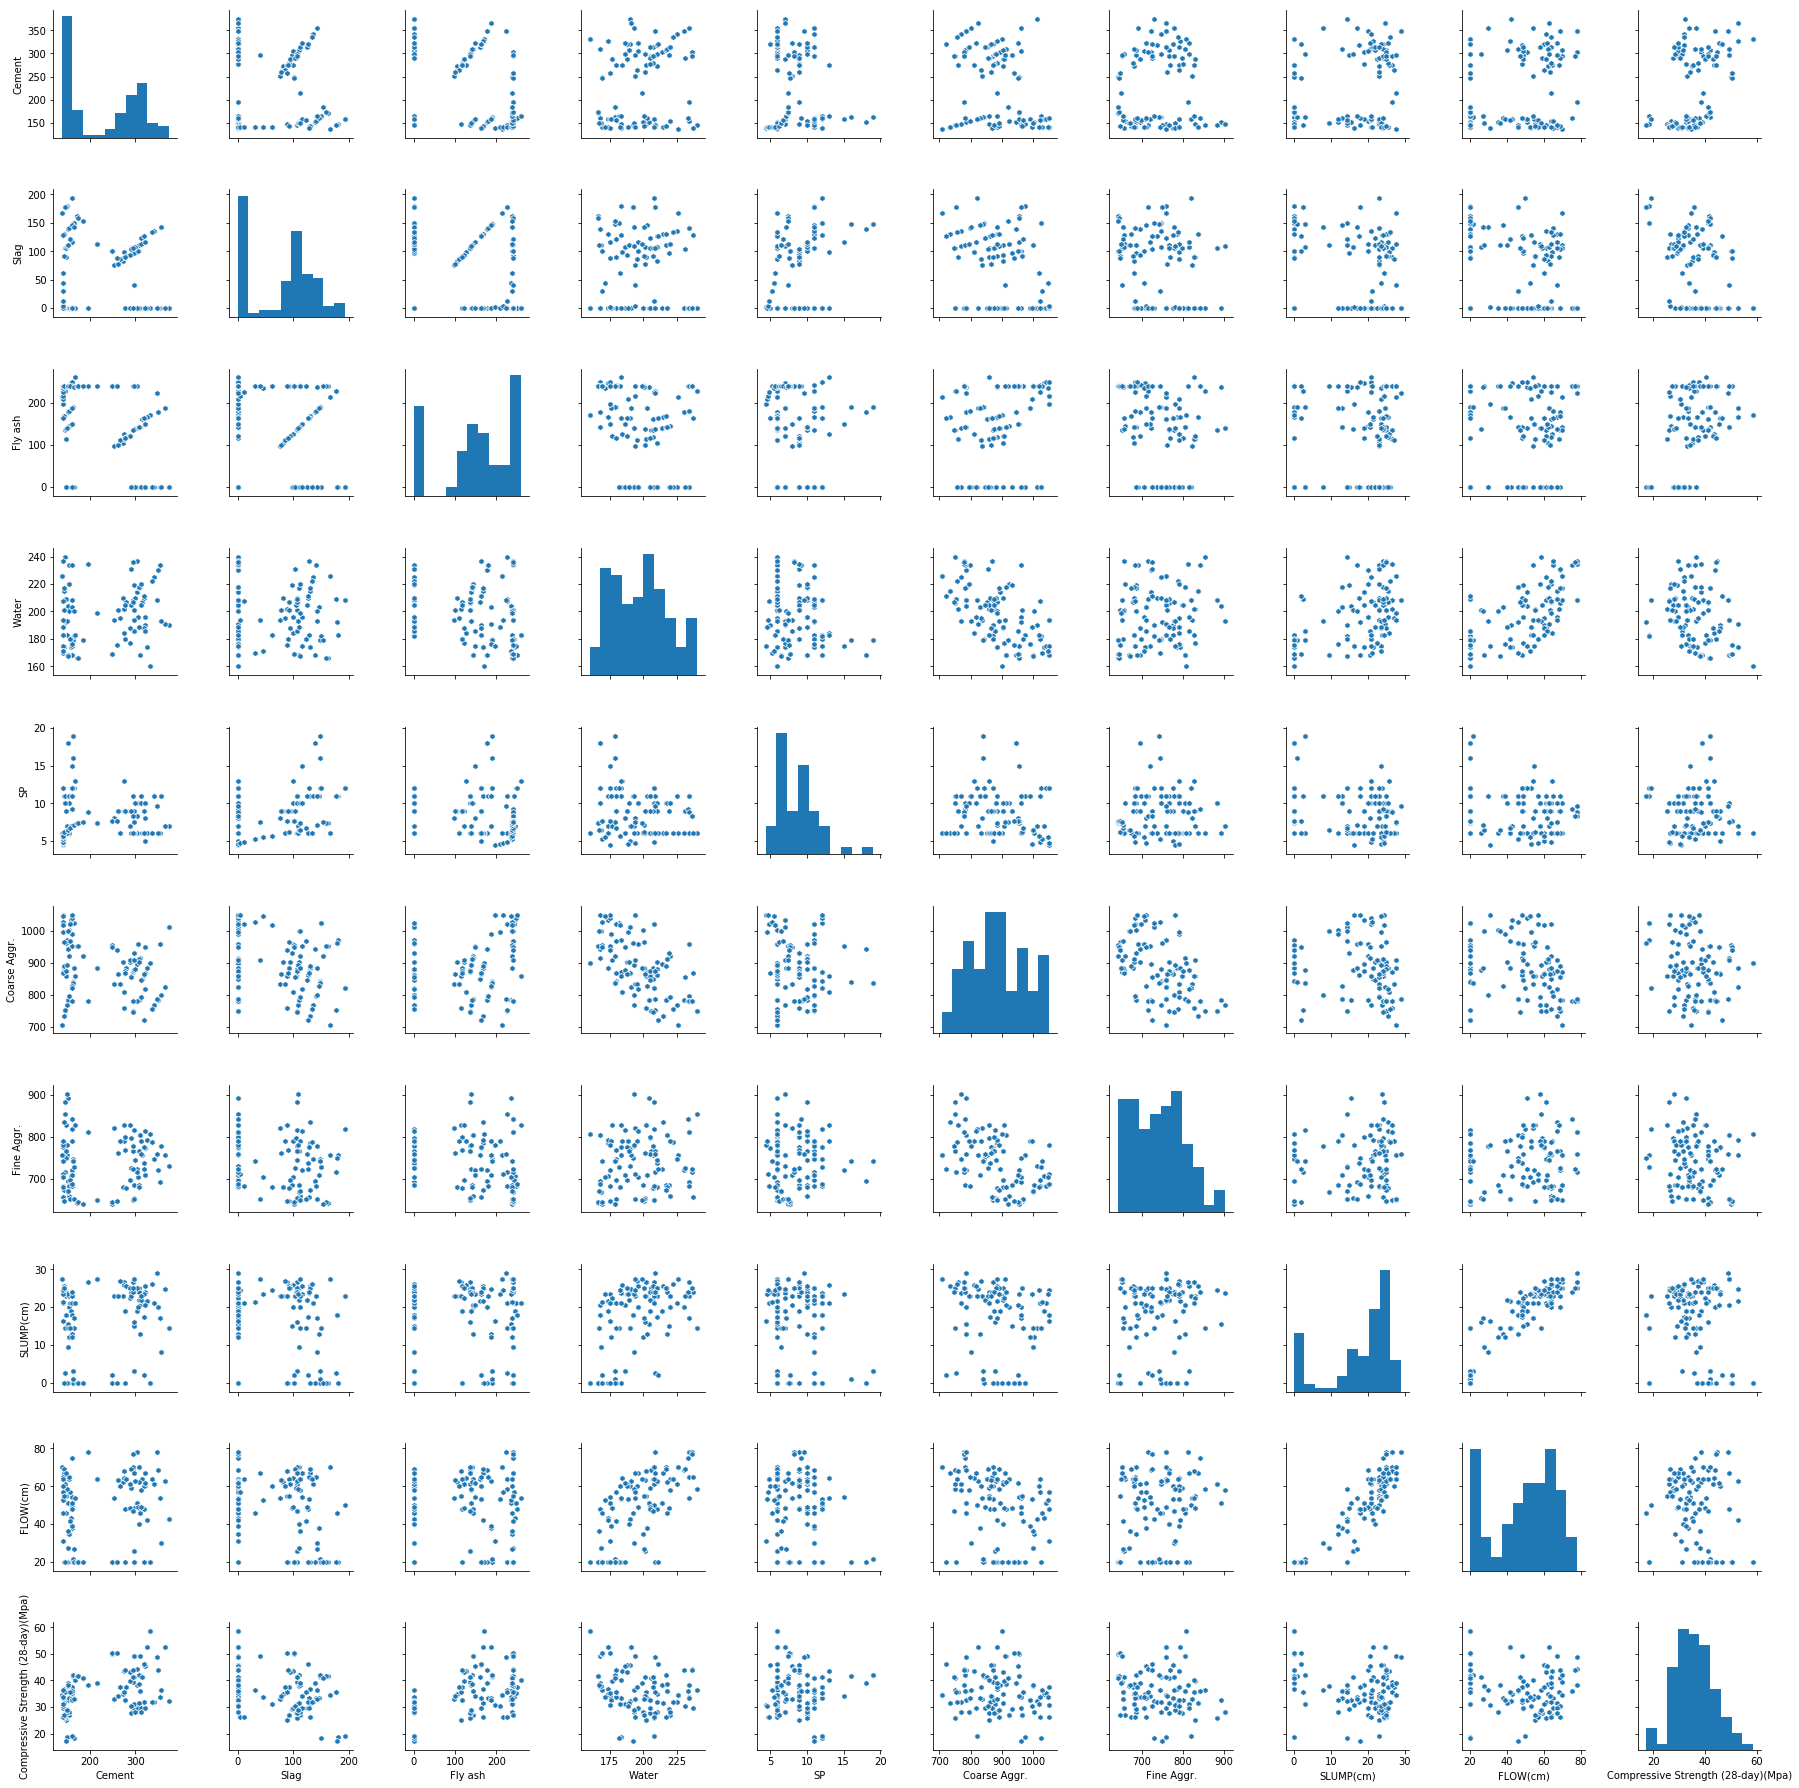

In [16]:
sns.pairplot(df,markers="h")
plt.show()

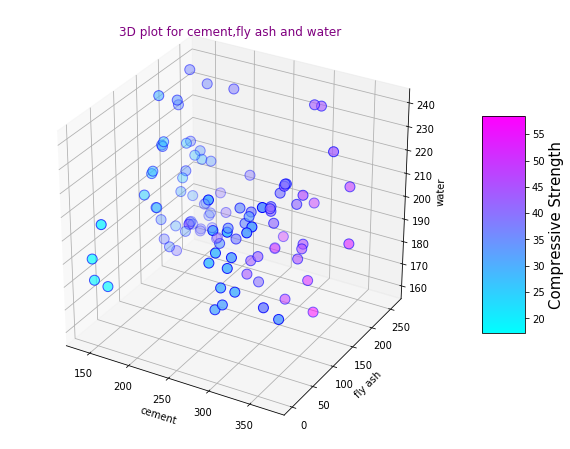

In [33]:
fig = plt.figure(figsize=(10,8))

ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["Cement"],
           df["Fly ash"],
           df["Water"],
           linewidth=1,edgecolor ="k",
           c=df["Compressive Strength (28-day)(Mpa)"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("fly ash")
ax.set_zlabel("water")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Compressive Strength",fontsize = 15)

plt.title("3D plot for cement,fly ash and water",color="purple")
plt.show()

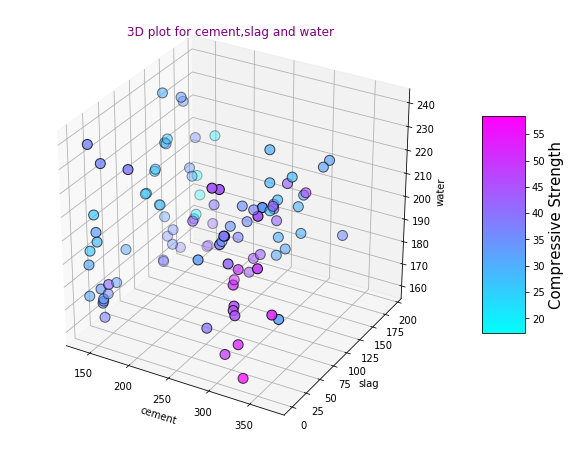

In [37]:
fig = plt.figure(figsize=(10,8))

ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["Cement"],
           df["Slag"],
           df["Water"],
           linewidth=1,edgecolor ="k",
           c=df["Compressive Strength (28-day)(Mpa)"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("slag")
ax.set_zlabel("water")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Compressive Strength",fontsize = 15)

plt.title("3D plot for cement,slag and water",color="purple")
plt.show()

#### •	In plain English, explain your exploratory analysis process and what you observed about the data.

For the exploratory analysis, the most important thing is to have a basic understanding of your data. The steps are presented as follows:
- Step 1: Obtain the general information about the dataset
- Step 2: Identify the variable type of the dataset
- Step 3: Check missing values
- Step 4: Calculate basic statistics related to each variable
- Step 5: Use the histogram to understand variables' distributions
- Step 6: Use Boxplot to identify possible outliers
- Step 7: Use other visualizations to understand relationships between variables

My general observation of the data:

- 1. The dataset is quite small. It only has 103 records and 10 variables.
- 2. All the variables are numerical variables and there are no missing values in the dataset.
- 3. The range of different numerical variables varies a lot and some of the input variables have a very large standard deviation.

#### •	In plain English, explain the visual representations you generated and what they reveal about the data structure.

The visual representation can be split into two parts: visualizations for single variable and visualizations for multiple variables. 

For single variable box plot and histogram are adopted to help understand each variable's distribution and check outliers. As we can see from the histogram, not all the variables have the same scale, for example, the course aggregation ranges from 700 to 1100 while the SP(superplasticizer) ranges from 5 to 20. This issue may need data transformation like standardization to make all the variables evaluated under the same scale; I especially check the distribution for the target variable(Compressive Strength (28-day)(Mpa)). The target variable follows the normal distribution, which is good because it implies that our data does not suffer from imbalance. If most of the values in the target variable are the same then imbalance occurs and would cause harm to the later model building. There are few potential outliers in Compressive Strength, SP, and FLOW. After careful examination, I found those potential outliers are not the wrong record so I just kept them in the dataset.

When it comes to multivariate analysis, I mainly used a scatter plot matrix, 3D plot, and correlation matrix to examine the relationship among different variables. It seems that there exists a positive linear relationship between cement, fly ash and our target variable and later correlation matrix proves that. The 3D plot reveals concrete that has higher compressive strength is made of cement range from 150~300, slag range from 100~200, water 170~200, and fly ash 150~250.

## Step 2: Generate a visual representation that illustrates the correlation between CS and the  7 input measurement features

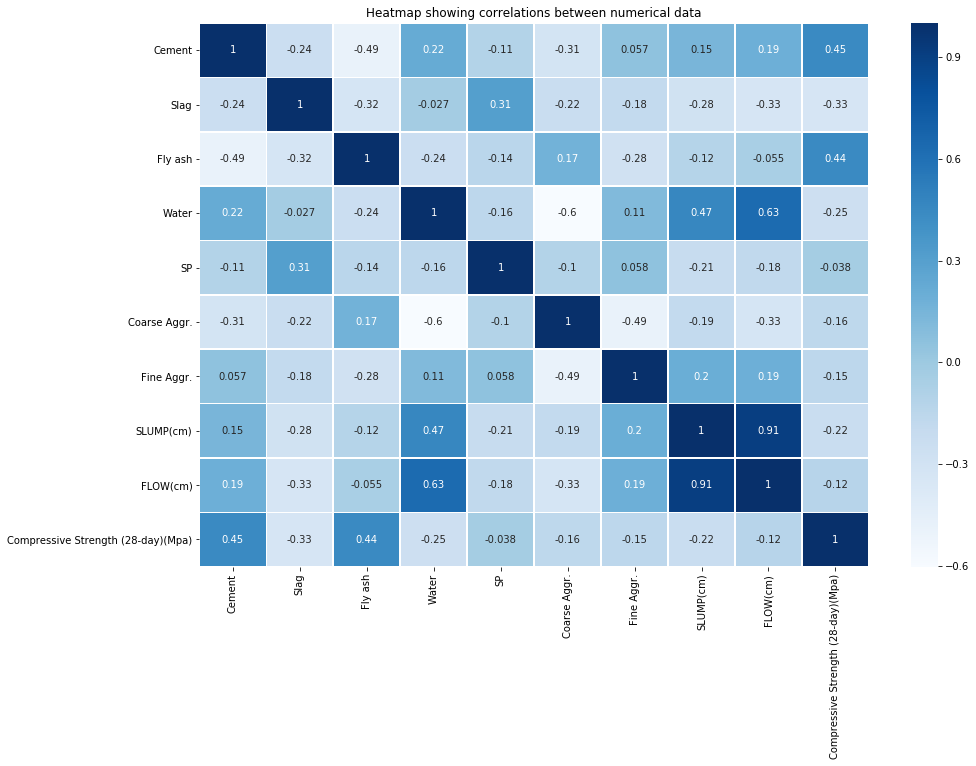

In [19]:
# correlation matrix of numerical data
plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

#### •	Select one of the correlations you demonstrate and explain, in plain English, what the correlation says of the sample data.

As we can see from the correlation matrix, the ingredient cement has the highest positive linear relationship with the target variable. It means with more cement added, the compressive strength of a type of cement tend to be higher.

#### •	Which inputs are most predictive of CS? How did you know which inputs are most predictive of CS?

Because cement and fly ash are the top 2 input variables that have the highest linear relationship with the target variable CS, they should become most predictive in the model.

## Step 3: Decision Tree Model

In [43]:
# rename our target variable
df = df.rename(columns={"Compressive Strength (28-day)(Mpa)":"CS"})

In [39]:
# So we put cement and fly ash as our input variables here
y = df['CS'] 
X = df[['Cement','Fly ash']]

In [40]:
# split the train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [41]:
# check the ideal depth of the decision tree when build models based on r2 and RMSE
def check(n):
    model = tree.DecisionTreeRegressor(max_depth = n)
    model = model.fit(X_train, y_train)
    y1 = model.predict(X_test)
    RMSE = mean_squared_error(y_test, y1)
    r2 = r2_score(y_test, y1)
    return [RMSE,r2,n]

results = [check(n) for n in range(1,11)]  # differnt numbers of depth
results

[[52.08757002786066, 0.20277505858574718, 1],
 [13.433864334787502, 0.7943883406052632, 2],
 [19.85198629208092, 0.6961559427672386, 3],
 [23.111807712227172, 0.6462628312378091, 4],
 [23.02134826611468, 0.6476473559255382, 5],
 [27.83389505555555, 0.5739890468469389, 6],
 [33.77299482169989, 0.48308831063318836, 7],
 [27.64500841346154, 0.5768800464097288, 8],
 [31.383905999999993, 0.5196544471393527, 9],
 [32.58275120192306, 0.50130555324093, 10]]

In [42]:
optmodel = tree.DecisionTreeRegressor(max_depth = 2)
optmodel = optmodel.fit(X_train, y_train)
tree.export_graphviz(optmodel) 

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[1] <= 115.5\\nmse = 59.059\\nsamples = 77\\nvalue = 35.781"] ;\n1 [label="X[0] <= 208.5\\nmse = 29.93\\nsamples = 20\\nvalue = 29.37"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 9.68\\nsamples = 4\\nvalue = 19.963"] ;\n1 -> 2 ;\n3 [label="mse = 7.339\\nsamples = 16\\nvalue = 31.721"] ;\n1 -> 3 ;\n4 [label="X[0] <= 161.1\\nmse = 49.796\\nsamples = 57\\nvalue = 38.031"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 16.407\\nsamples = 27\\nvalue = 32.739"] ;\n4 -> 5 ;\n6 [label="mse = 31.957\\nsamples = 30\\nvalue = 42.793"] ;\n4 -> 6 ;\n}'

In [37]:
img = 'tree.png'
Image(url=img)

#### •	In plain English, explain the visual representation you generated.

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets based on the rules at each node. For the decision I built, it first determines whether the fly ash is lower than 115.5 or not, if yes then it further determines whether the cement is lower than 208.5 or not. For concrete made of fly ash lower than 115.5 and cement lower than 208.5 the decision tree predicts the value of CS 19.963; for concrete made of fly ash lower than 115.5 and cement higher than 208.5 the decision tree predicts the value of CS 31.721; for concrete made of fly ash higher than 115.5 and cement lower than 161.1 the decision tree predicts the value of CS 32.739; for concrete made of fly ash higher than 115.5 and cement higher than 161.1 the decision tree predicts the value of CS 42.793; 

#### •	In plain English, explain what the test error signifies.

Here we use RMSE (Root Mean Square Error) as our test error. The RMSE represents for the standard deviation of prediction errors (the difference between the predicted value and true observation); it measures how spread out those prediction errors are. When we try to build regression models, the smaller the RMSE, the better our model is.

#### •	What is the ideal depth of your tree model? How did you determine the ideal tree depth?

The ideal depth of my tree model is 2. To determine the ideal tree depth I wrote a loop and tested the RMSE and r2 for each depth. As we can see from the result, when the depth is 2 we have a tree model that has lowest RMSE and highest r2 score, so I chose 2 as the ideal depth for the decision tree model.

#### •	What is the accuracy score of your model? In plain English, explain what the accuracy score signifies.

I think the term accuracy score is not quite accurate here since accuracy score usually refers to the evaluation metric we use for classification problem. Here I used R-squared as our evaluation criterion and it represents for the proportion of variance explained by the model. The reason why it called R-squared is that it calculates the square of the correlation r between the predicted and actual values. Ranging from 0 to 1, R-squared is a way to determine the fitness of regression models, the higher the R-squared, the better our model is.

## Step 4: Random Forest Model

In [55]:
# let us first use all the input variables
y = df['CS']
X = df.drop(['CS', 'SLUMP(cm)', 'FLOW(cm)'], axis = 1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [59]:
# find out the ideal tree numer 
def check(n):
    rf = RandomForestRegressor(n_estimators = n, random_state = 42, max_depth = 5)
    rf.fit(X_train,y_train)
    y1 = rf.predict(X_test)
    RMSE = mean_squared_error(y_test, y1)
    r2 = r2_score(y_test, y1)
    return [RMSE,r2,n]
results = [check(i) for i in range(100,2501,100)]
results

[[10.720143814613566, 0.8359231190860626, 100],
 [10.58081597872115, 0.8380555976360755, 200],
 [10.47714349377507, 0.8396423541442636, 300],
 [10.77806412289675, 0.8350366213217582, 400],
 [10.738700355039837, 0.8356391024416642, 500],
 [10.765562929590724, 0.8352279580091035, 600],
 [10.746504979090869, 0.8355196489722757, 700],
 [10.82756861087235, 0.8342789316751691, 800],
 [10.776960333410603, 0.8350535153428836, 900],
 [10.704997743419941, 0.8361549368827756, 1000],
 [10.627902706019752, 0.8373349129623244, 1100],
 [10.595027385987862, 0.8378380853136623, 1200],
 [10.587716214603567, 0.8379499862561597, 1300],
 [10.705913772061697, 0.8361409166303456, 1400],
 [10.779334830482393, 0.8350171725400242, 1500],
 [10.776493256230493, 0.8350606641804537, 1600],
 [10.750881743634693, 0.8354526605169653, 1700],
 [10.687149760867829, 0.836428108713154, 1800],
 [10.725981225828038, 0.8358337747413183, 1900],
 [10.706460060724961, 0.8361325554234909, 2000],
 [10.707754350191092, 0.8361127457

In [60]:
# select the most important features
sel = SelectFromModel(RandomForestRegressor(n_estimators = 300))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

3
Index(['Cement', 'Fly ash', 'Water'], dtype='object')


In [61]:
# resplit the trainning set based on the feature importance
X2 = df[['Cement','Fly ash', 'Water']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=42, test_size=.25)

In [62]:
# use the optimal features and tree numbers to rerun the random forest model
optimal_rf = RandomForestRegressor(n_estimators = 300, random_state = 42, max_depth = 5)
optimal_rf.fit(X2_train,y2_train)
y2 = optimal_rf.predict(X2_test)

print ("R^2 is: \n", r2_score(y_test, y2))
print ('RMSE is: \n', mean_squared_error(y_test, y2))

R^2 is: 
 0.8396648556285785
RMSE is: 
 10.47567333450245


#### •	How many trees does your model include? How did you determine the number of trees to include?

By using the loop to go through all the tree numbers in the random forest model, I found the model has the lowest RMSE and the highest R-squared when the tree number is equal to 300. So I included 300 trees in the model.

#### •	How many features does your model account for? How did you determine how many features to account for?

Ultimately there are three features entered in the model. They are Cement, Fly ash, and water. Those three features are selected because they are the top 3 variables that decrease the impurity. This process could be done by using selectFromModel object from sklearn to automatically select the features.

## Step 5: Additional analyses

####  •	What alternative methods might you use to predict CS?

#### 1. Linear Regression 

In [67]:
y = df['CS']
X = df.drop(['CS', 'SLUMP(cm)', 'FLOW(cm)'], axis = 1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [69]:
# import linear model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
print ("R^2 is: \n", model.score(X_test, y_test))
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.9398297608344967
RMSE is: 
 3.931288878853244


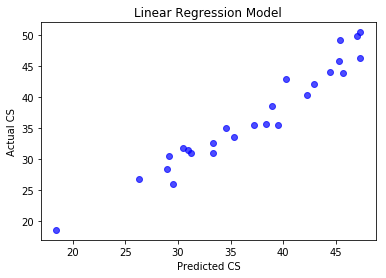

In [70]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b')
plt.xlabel('Predicted CS')
plt.ylabel('Actual CS')
plt.title('Linear Regression Model')
plt.show()

#### 2. Ridge Regression 

R^2 is: 0.9398300396456132
RMSE is: 3.9312706624217126


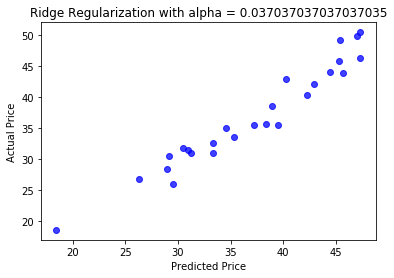

R^2 is: 0.9398305971300042
RMSE is: 3.931234238564726


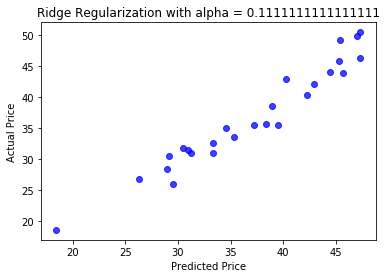

R^2 is: 0.9398322684812157
RMSE is: 3.9311250389916186


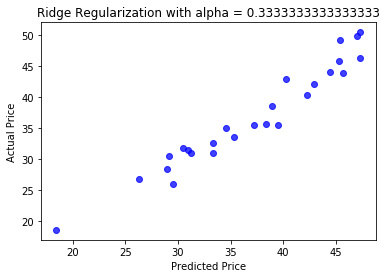

R^2 is: 0.9398372726369796
RMSE is: 3.930798086960592


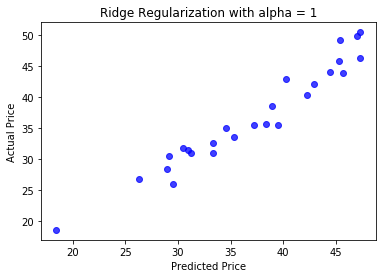

R^2 is: 0.9398521965524789
RMSE is: 3.929823016496442


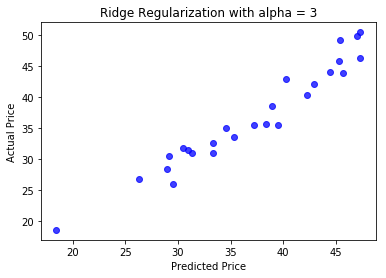

R^2 is: 0.9398961852353406
RMSE is: 3.9269489674295235


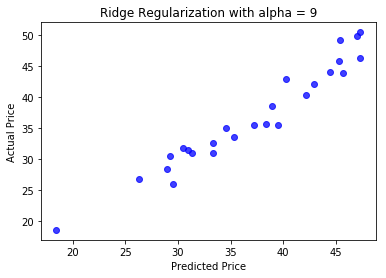

In [71]:
# regularization
for i in range (-3, 3):
    alpha = 3**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    
    print('R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge)))

    plt.show()


#### 3. Gradient Boosting Regression 

In [72]:
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
model_score = model.score(X_train,y_train)

print('R^2 is: ', model_score)
y_predicted = model.predict(X_test)
print("RMSE is: %.2f"% mean_squared_error(y_test, y_predicted))


R^2 is:  0.9999500305117673
RMSE is: 8.97


We could also use KNN regressor and XGBoost regressor to do the job.

####  •	What additional data, not included in the dataset, might help better predict CS?

To understand additional data that could be useful in predicting concrete compressive strength, I think we need to understand how concrete is made. Apart from all the ingredients listed in the dataset, the concrete production also needs limestone and iron ore, which could be measured and added as our predictor variables. We could also measure the heating temperature in the production process as our other predictor variable. In addition, the cement production involves dry process or wet process in the USA, so we can also include this categorical data as our predictor variable.

#### •	Based on the EDA you completed in the first step, what additional analyses might you complete based on the data structure?

I think for the Exploratory data analysis part, we may also use a clustering method like K-means clustering to create concrete segments based on feature similarity. In this way, we could have an intuitive understanding of different groups of concrete made of different amount of ingredients. A similar approach is to group each concrete by its compressive strength (high, medium, low) and conduct an analysis of variance to check the mean difference of each ingredient, so that we could better understand what proportion of ingredients that lead to different grades of concrete.

#### •	What applications might your analysis lead to? In plain English, describe what business value these models could provide to a prospective client.

In my opinion, there are two applications. One is that we could use the predictive model to evaluate the grade of concrete solely from the amount of different ingredients. We could improve the efficiency of the evaluation process by using this model. Secondly, the analysis also provides insight into the concrete production process. Different building structures have different requirements for the concrete's compressive strength. The analysis could help understand ingredients proportion to produce the proper concrete so that the production cost could be saved.